#### 엔트로피
    - 잘 섞여있고, 펴져있는 정도
    - 엔트로피가 낮아야지 분류할때 좋다
    - -∑ (pi^2 * log2(pi))

#### 정보이득(information gain)
    - 정보 획득이 크면 분류할때 좋다
    - 분기 이전의 불순도와 분기 이후의 불순도의 차이를 정보 획득이라고 한다
    - 전 엔트로피 - 현재 엔트로피
    - 1 - 엔트로피
    - information gain이 큰 순서대로 분기를 나눠준다

#### 지니 계수
    - 불순도라고 한다
    - 1 - ∑ p^2
    - 최댓값은 0.5

* 지니계수가 낮을수록, 엔트로피가 낮을수록, 정보이득이 많을 수록 분류할때 유리하다
* information gain이 큰 순서대로 분기를 나눠준다

#### 엔트로피
    - 잘 섞여있고, 펴져있는 정도
    - 엔트로피가 낮아야지 분류할때 좋다
    - -∑ (pi^2 * log2(pi))

#### 정보이득(information gain)
    - 정보 획득이 크면 분류할때 좋다
    - 분기 이전의 불순도와 분기 이후의 불순도의 차이를 정보 획득이라고 한다
    - 전 엔트로피 - 현재 엔트로피
    - 1 - 엔트로피
    - information gain이 큰 순서대로 분기를 나눠준다

#### 지니 계수
    - ∑ (pi)^2 : 지니          ---> 커질수록 유리
    - 1 - ∑ (pi)^2 : 지니 계수 ---> 낮을수록 유리
    - 불순도라고 한다
    - 최댓값은 0.5


- 지니계수가 낮을수록, 엔트로피가 낮을수록, 정보이득이 많을 수록 분류할때 유리하다
- information gain이 큰 순서대로 분기를 나눠준다

### Decision Tree

    - 노드
        - 루트 노드 : 시작 노드
        - 규칙 노드 : 중간 노드
        - 리프 노트 : 마지막 노드
        - 결정 트리의 기본 아이디어는, Leaf Node가 가장 섞이지 않은 상태로 완전히 분류되는 것, 즉 복잡성(entropy)이 낮도록 만드는 것
    - depth: 얼마나 분기하느냐?
        - max_depth가 너무 크면 과적합(overfitting)의 문제가 있다
    - 가지 치기(pruning)
        - 과대 적합(overfitting)을 막기 위해서 가지 치기를 한다
    - 장점: 
        -데이터 전처리(정규화,결측치,이상치 제거)를 안해도 된다
        - 수치형, 범주형 변수를 한꺼번에 다룰 수 있다
        - 쉽다, 직관적이다
    - 단점:
        - 과적합으로 알고리즘 성능이 떨어진다
        - 극복하기 위해 트리의 크기를 사전에 제한하는 튜닝 필요
        - 샘플의 사이즈가 커지면 효율성 및 가독성이 떨어진다떨어진다


### Decision Tree Parameter
    - max_depth : 트리의 최대 깊이, 층
    - max_feautres : 최대 피쳐 개수 선정
    - min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터 수
    - min_samples_leaf : Leaf node가 되기 위한 최소한의 샘플 데이터 수, 데이터의 비대칭이 있을땐 특정 데이터가 극도로 작을 수 있으니 작게 설정 필요
    - max_leaf_nodes : Leaf node의 최대 개수
    - max_depth, min_samples_leaf를 주로 쓴다
    

In [5]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33, random_state=42)

dt_clf = DecisionTreeClassifier(random_state=0)

dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
pred

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [6]:
# pip install graphviz

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from sklearn.tree import export_graphviz

tree_dot = export_graphviz(
    dt_clf, 
    out_file="tree.dot",
    feature_names=iris.feature_names, 
    class_names=['0', '1', '2'],
    filled=True
)





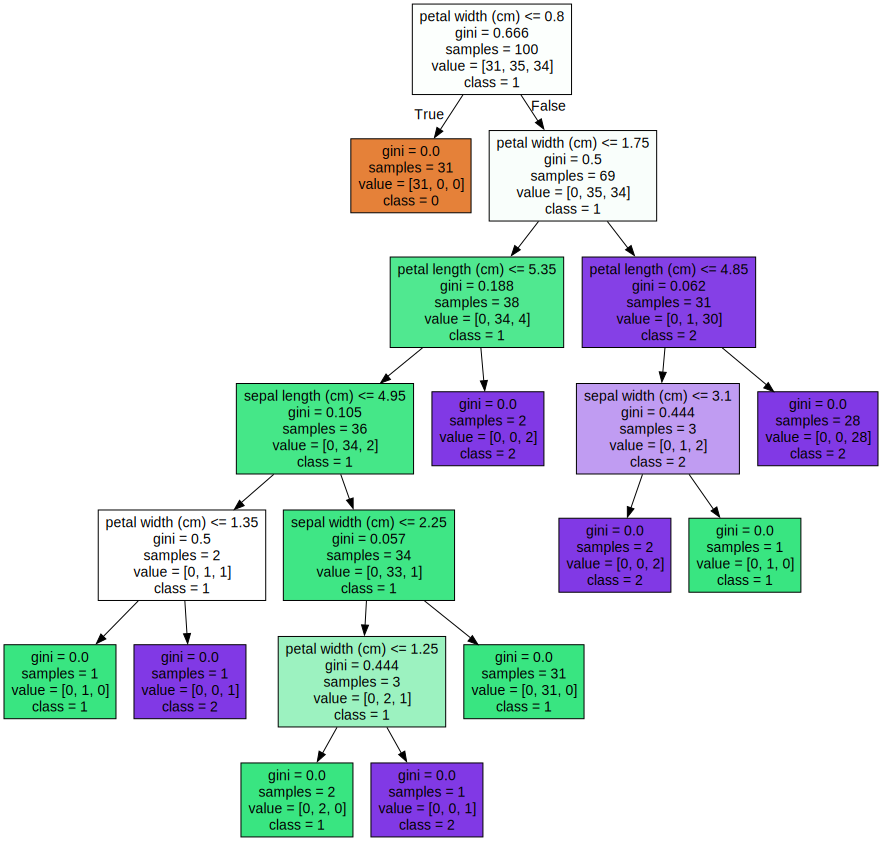

In [11]:
import graphviz

with open("tree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)


In [17]:
dt_clf_1 = DecisionTreeClassifier(random_state=0,max_depth=3)

dt_clf_1.fit(X_train, y_train)
pred_1 = dt_clf_1.predict(X_test)

In [21]:
from sklearn.tree import export_graphviz

tree_dot = export_graphviz(
    dt_clf_1, 
    out_file="tree_1.dot",
    feature_names=iris.feature_names, 
    class_names=['0', '1', '2'],
    filled=True
)

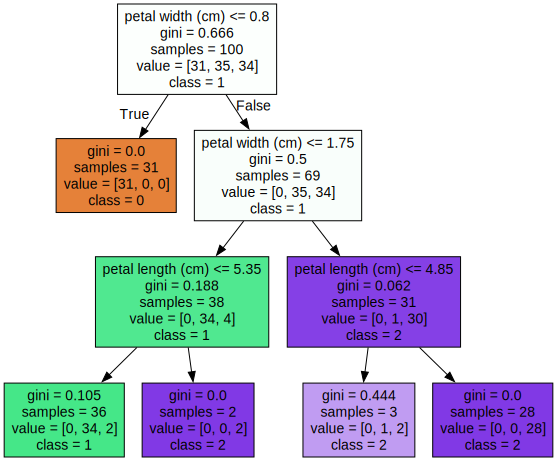

In [22]:
import graphviz

with open("tree_1.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)